No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0.00990099 0.01022767 0.01055369 ... 0.01055369 0.01022767 0.00990099]


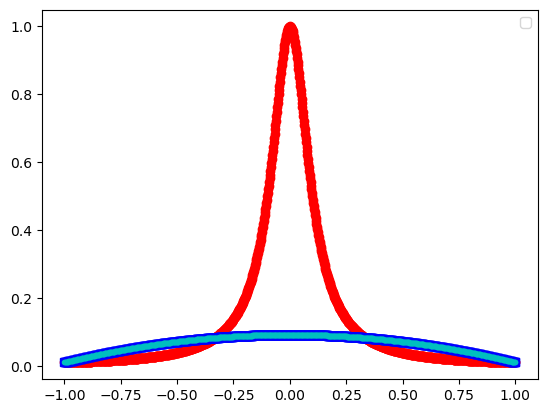

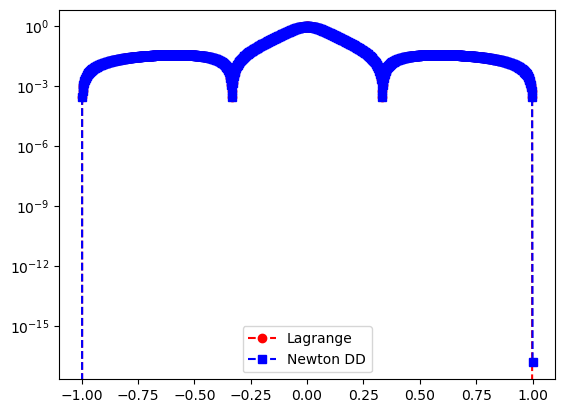

In [39]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

def driver():


    f = lambda x: 1/(1+(10*x)**2)

    N = 3
    ''' interval'''
    a = -1
    b = 1
   
   
    ''' create equispaced interpolation nodes'''
    h = 2/(N -1)
    xj = []
    yj = []
    for j in range(N):
        x = -1 + (j-1)*h
        xj.append(x)
    
    for j in xj:
        yj.append(f(j))
        


    
    xint = np.linspace(a,b,N+1)
    
    ''' create interpolation data'''
    yint = f(xint)
    
    ''' create points for evaluating the Lagrange interpolating polynomial'''
    Neval = 1000
    xeval = np.linspace(a,b,Neval+1)
    yeval_l= np.zeros(Neval+1)
    yeval_dd = np.zeros(Neval+1)
    yeval_v = np.zeros(Neval+1)
  
    '''Initialize and populate the first columns of the 
     divided difference matrix. We will pass the x vector'''
    y = np.zeros( (N+1, N+1) )
     
    for j in range(N+1):
        y[j][0]  = yint[j]

    y = dividedDiffTable(xint, y, N+1)
    ''' evaluate lagrange poly '''
    for kk in range(Neval+1):
        yeval_l[kk] = eval_lagrange(xeval[kk],xint,yint,N)
        yeval_dd[kk] = evalDDpoly(xeval[kk],xint,y,N)
        #yeval_v[kk] = mono_eval(xeval[kk], xint, yint, N)
        
    print(yeval_l)
        
          

    


    ''' create vector with exact values'''
    fex = f(xeval)
       

    plt.figure()    
    plt.plot(xeval, fex, 'ro-')
    plt.plot(xeval, yeval_l, 'bs--') 
    plt.plot(xeval, yeval_dd, 'c.--')
    plt.legend()

    plt.figure() 
    err_l = abs(yeval_l-fex)
    err_dd = abs(yeval_dd-fex)
    plt.semilogy(xeval,err_l, 'ro--', label='Lagrange')
    plt.semilogy(xeval,err_dd, 'bs--', label='Newton DD')
    plt.legend()
    plt.show()

def eval_lagrange(xeval,xint,yint,N):

    lj = np.ones(N+1)
    
    for count in range(N+1):
        for jj in range(N+1):
            if (jj != count):
                lj[count] = lj[count]*(xeval - xint[jj])/(xint[count]-xint[jj])

    yeval = 0.
    
    for jj in range(N+1):
        yeval = yeval + yint[jj]*lj[jj]
  
    return(yeval)
  
    


''' create divided difference matrix'''
def dividedDiffTable(x, y, n):
 
    for i in range(1, n):
        for j in range(n - i):
            y[j][i] = ((y[j][i - 1] - y[j + 1][i - 1]) /
                                     (x[j] - x[i + j]));
    return y;
    
def evalDDpoly(xval, xint,y,N):
    ''' evaluate the polynomial terms'''
    ptmp = np.zeros(N+1)
    
    ptmp[0] = 1.
    for j in range(N):
        ptmp[j+1] = ptmp[j]*(xval-xint[j])
     
    '''evaluate the divided difference polynomial'''
    yeval = 0.
    for j in range(N+1):
        yeval = yeval + y[0][j]*ptmp[j]  

    return yeval



            

def mono_eval(xeval, xint, yint, N):
    matrix = np.zeros((N+1, N+1))
    for i in range(N+1):
        for j in range(N+1):
            matrix[i][j] = xint[i]**j
            
             
    a_const = la.inv(matrix)*yint

    
    yeval = 0.
    for i in range(N+1):
        yeval += a_const[i]*(xeval**i)
        
    return yeval
            

driver() 